> '没有测量，就没有科学'这是科学家门捷列夫的名言。在计算机科学特别是机器学习领域中，对模型的评估同样至关重要，只有选择与问题相匹配的评估方法，才能快速地发现模型选择或训练过程中出现的问题，迭代地对模型进行优化。模型评估主要分为离线评估和在线评估两个阶段。针对分类、排序、回归、序列预测等不同类型的机器学习问题，评估指标的选择也有所不同。知道每种评估指标的精确定义、有针对性地选择合适的评估指标、更具评估指标的反馈进行模型调整，这些都是模型评估阶段的关键问题

# 模型评估指标

## 准确率

准确率是指分类正确的样本占总样个数的比例：$$Accuracy = \frac{n_{correct}}{n_{total}}$$

$n_{correct}$为被正确分类的样本个数，$n_{total}$为总样本的个数

<b>准确率的局限性:</b>准确率是分类问题中最简单也是最直观的评价指标，但存在明显的缺陷，当不同总类的样本比例非常不均衡时，占比大的类别往往成为影响准确率的最主要因素。比如：当负样本占99%,分类器把所有样本都预测为负样本也可以得到99%的准确率，换句话说总体准确率高，并不代表类别比例小的准确率高

## 精确率和召回率

精确率是指正确分类的正样本个数占分类器判定为正样本的样本个数的比例

召回率是指正确分类的正样本个数占真正的正样本数的比例

Precison值和Recall值是既矛盾又统一的两个指标，为了提高Precison值，分类器需要尽量在‘更有把握’时才把样本预测为正样本，但此时往往会因为过于保守而漏掉很多‘没有把握’的正样本，导致Recall值降低

在排序问题中，通常没有一个确定的阈值把得到的结果直接判定为正样本或负样本，而是采用TopN返回结果的Precision值和Recall值来衡量排序模型的性能，即认为模型返回的TopN的结果就是模型判定的正样本，然后计算N个位置上的Precision和前N个位置上的Recall

## F1分数

F1分数是精度和召回率的谐波平均值，正常的平均值平等对待所有的值，而谐波平均值回给予较低的值更高的权重，因此，只有当召回率和精度都很高时，分类器才能得到较高的F1分数
$$F_1 = \frac{1}{\frac{1}{精度}+\frac{1}{召回率}}$$

F1分数对那些具有相近的精度和召回率的分类器更为有利。但这并不一定能符合你的期望，在某些情况下，你更关心的是精度，而另一些情况下，你可能真正关心的是召回率。精确率与召回率的权衡将是很值得思考的问题。

## 均方误差、根均方误差、绝对百分比误差

均方误差：$$MSE =\frac{1}{n}\sum_{i=1}^n(y_{pred} - y_i)^2$$ 

根均方误差：$$RMES = \sqrt{MSE}$$

<b>均方误差和根均方误差都会受到异常值的影响，而影响最终的模型评估</b>

平均绝对百分比误差：$$MAPE = \sum_{i=1}^n|\frac{(y_{pred}-y_i)}{y_i}|*\frac{100}{n}$$

<b>平均绝对百分比误差提高了异常值的鲁棒性，相当于把每个点的误差进行了归一化处理，降低了个别离群带来的绝对误差的影响</b>

## ROC曲线

### 什么是ROC曲线？

二值分类器是机器学习领域中最常见也是应用最广泛的分类器。评价二值分类器的指标很多，比如precision,recall,F1 score,P-R曲线等，但发现这些指标或多或少只能反映模型在某一方面的性能，相比而言，ROC曲线则有很多优点，经常作为评估二值分类器最重要的指标之一

ROC曲线是Receiver Operating Characteristic Curve的简称，中文名为'受试者工作特征曲线'

ROC曲线的横坐标为假阳性率(FPR),纵坐标为真阳性率(TPR)，FPR和TPR的计算方法分别为:$$FPR = \frac{FP}{N}$$ $$TPR = \frac{TP}{P}$$
P是真实的正样本数量，N是真实的负样本数量，TP是P个正样本中被分类器预测为正样本的个数，FP为N个负样本中被预测为正样本的个数

### ROC曲线绘制

<b>创建数据集</b>

In [6]:
import pandas as pd

column_name = ['真实标签','模型输出概率']
datasets = [['p',0.9],['p',0.8],['n',0.7],['p',0.6],
           ['p',0.55],['p',0.54],['n',0.53],['n',0.52],
           ['p',0.51],['n',0.505],['p',0.4],['p',0.39],
           ['p',0.38],['n',0.37],['n',0.36],['n',0.35],
           ['p',0.34],['n',0.33],['p',0.30],['n',0.1]]

data = pd.DataFrame(datasets,index = [i for i in range(1,21,1)],columns=column_name)
print(data)

   真实标签  模型输出概率
1     p   0.900
2     p   0.800
3     n   0.700
4     p   0.600
5     p   0.550
6     p   0.540
7     n   0.530
8     n   0.520
9     p   0.510
10    n   0.505
11    p   0.400
12    p   0.390
13    p   0.380
14    n   0.370
15    n   0.360
16    n   0.350
17    p   0.340
18    n   0.330
19    p   0.300
20    n   0.100


<b>绘制ROC曲线</b>

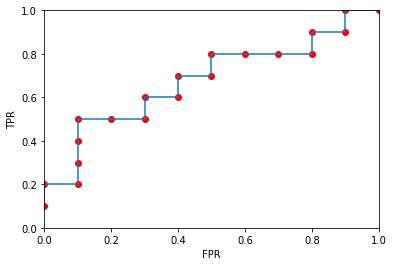

In [16]:
# 计算各种概率情况下对应的(假阳率，真阳率)
points = {0.1:[1,1],0.3:[0.9,1],0.33:[0.9,0.9],0.34:[0.8,0.9],0.35:[0.8,0.8],
        0.36:[0.7,0.8],0.37:[0.6,0.8],0.38:[0.5,0.8],0.39:[0.5,0.7],0.40:[0.4,0.7],
        0.505:[0.4,0.6],0.51:[0.3,0.6],0.52:[0.3,0.5],0.53:[0.2,0.5],0.54:[0.1,0.5],
        0.55:[0.1,0.4],0.6:[0.1,0.3],0.7:[0.1,0.2],0.8:[0,0.2],0.9:[0,0.1]}
X = []
Y = []
for value in points.values():
        X.append(value[0])
        Y.append(value[1])
        
import matplotlib.pyplot as plt

plt.scatter(X,Y,c = 'r',marker = 'o')
plt.plot(X,Y)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

<b>AUC指ROC曲线下的面积大小，该值能够量化地反映基于ROC曲线衡量出的模型性能</b>,AUC越大说明分类器越可能把真正的正样本排在前面，分类性能越好

ROC曲线相比P-R曲线，当正负样本的分布发生变化时，ROC曲线的形状能够保存基本不变，而P-R曲线的形状一般会发生激烈的变化，这个特点让ROC曲线能够尽量降低不同测试集带来的干扰，更加客观地衡量模型本身的性能

# 模型评估方法

## Holdout检验

Holdout检验是最简单也是最直接的验证方法，它将原始的样本随机划分为训练集和验证集两部分。sklearn.model_selction.train_test_split函数就是使用该方法。比方说，将样本按照70%-30%的比例分成两部分，70%的样本用于模型训练，30%的样本用于模型验证

Holdout检验的缺点很明显，即在验证集上计算出来的评估指标与原始分组有很大关系，为了消除随机性，研究者们引入了'交叉验证'的思想

## 交叉验证

k-flod交叉验证:首先将全部样本划分成K个大小相等的样本子集，依次遍历这k个子集，每次把当前子集作为验证集，其余的子集作为训练集。最后把K次评估指标的平均值作为最终的评估指标，在实际实验中，K经常取10

留一验证:每次留下一个样本作为验证集，其余所有样本作为测试集，样本总数为n,依次对n个样本进行遍历，进行n次验证，再将评估指标求平均值得到最终的评估指标，在样本总数较多的情况下，留一验证法的时间开销极大

## 自助法

不管是Holdout检验还是交叉验证，都是基于划分训练集和测试集的方法进行模型评估的，然而，当样本规模较小时，将样本集进行划分会让训练集进一步减少，这可能会影响模型训练效果，自助法是可以维持训练集样本规模的验证方法

自助法是基于自助采样法的检验方法，对于总数为n的样本集合，进行n次有放回的随机抽样，得到大小为n的训练集，n次采样过程中，有的样本会被重复采样，有的样本没有被抽到过，将这些没有被抽到过的样本作为训练集，进行模型验证

## 超参数调优

为了进行超参数调优，一般会采用网格搜索、随机搜索、贝叶斯优化等算法。超参数搜索算法一般包括以下几个要素:
- (1)目标函数，即算法需要最大化/最小化的目标
- (2)搜索范围，一般通过上限和下限来确定
- (3)算法的其他参数，如搜索步长

### 网格搜索

网格搜索可能是最简单、应用最广泛的超参数搜索算法，它通过查找搜索范围内的所有的点来确定最优值。如果采用较大的搜索范围以及较小的步长，网格搜索有很大概率找到全局最优解，然而这种搜索方案十分消耗计算资源和时间，特别是需要调优的超参数比较的时候，因此，在实际应用过程中，网格搜索法一般会先使用较大的搜索范围和较大的步长，来寻找全局最优解可能的位置，然后会逐渐缩小搜索范围和步长，来寻找更精确的最优值，这种操作方案可以降低所需的时间和计算量，但由于目标函数一般是非凸的，所有很可能会错过全局最优解，sklearn提供了GridSearchCV类实现网格搜索

### 随机搜索

随机搜索的思想与网格搜索的思想比较相似，只是不再测试上界和下界之间的所有值，而是在搜索范围中随机选取样本点。它的理论依据是，如果样本点足够大，那么通过随机采样也能大概率地找到全局最优解或近似解，随机搜索一般会比网格搜索要快一些，但是和网格搜索的快速版一样，它的结果也是没法保证的，sklearn提供了RandomizedSearchCV类实现随机搜索

### 贝叶斯优化算法

贝叶斯优化算法在寻找最优超参数时，采用了与网格搜索，随机搜索完全不同的方法，网格搜索和随机搜索在测试一个新点时，会忽略前一个点的信息，而贝叶斯优化算法则充分利用了之前的信息，贝叶斯优化算法通过对目标函数形状进行学习，找到使目标函数向全局最优值提升的参数。具体来说，它学习目标函数形状的方法是，首先根据先验分布，假设一个搜索函数，然后，每一次使用新的采样点来测试目标函数时，利用这个信息来更新目标函数的先验分布，最后，算法测试由后验分布给出的全局最值最可能出现的位置的点。

对于贝叶斯优化算法，有一个需要注意的地方，一旦找到了一个局部最优值，它会在该区域不断采样，所以很容易陷入局部最优值，为了弥补这个缺陷，贝叶斯优化算法会在探索和利用之间找到一个平衡点，'探索'就是在还未取样的区域获取采样点，而'利用'则是根据后验分布在最可能出现全局最优值的区域进行采样

# 附：

## 降低过拟合风险的方法

- (1)从数据入手，后的更多的训练数据。使用更多的训练数据是解决过拟合问题最有效的手段，因为更多的样本能够让模型学习到更多更有效的特征，减少噪音的影响，当然，直接增加实验数据一般是很困难的，但是可以通过一定的规则来扩充训练数据。比如，在图像分类的问题上，可以通过图像的平移、旋转、缩放等方式扩充数据；更进一步地，可以使用生成式对抗网络来合成大量的新训练数据
- (2)降低模型复杂度。在数据较少时，模型过于复杂是产生过拟合的主要因素，适当降低模型复杂度可以避免拟合过多的采样噪音。例如，在神经网络中减少网络层数、神经元个数等;在决策树模型中降低树的深度、进行剪枝等
- (3)正则化方法
- (4)集成学习方法。集成学习是把多个模型集成在一起，来降低单一模型的过拟合风险

## 降低欠拟合风险方法

- (1)添加新特征。当特征不足或现有特征与样本标签的相关性不强时，模型容易出现不拟合，通过挖掘'上下文特征''ID类特征''组合特征'等新的特征，往往能够取得更好的效果，在深度学习的潮流中，有很多类型可以帮组完成特征工程，如因子分解机
- (2)增加模型复杂度。简单模型的学习能力较差，通过增加模型的复杂度可以使模型拥有更强的拟合能力,例如，在线性模型中添加高次项，在神经网络模型中增加网络层数或神经元个数等
- (3)减少正则化系数。正则化是用来防止过拟合的，但当模型出现欠拟合现象时，则需要针对性地减少正则化系数

<b>参考资料:</b>
- (1)<机器学习实战基于Scikit-Learn和TensorFlow>
- (2)<百面机器学习>